In [1]:
library(tidyverse)
library(pheatmap)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [3]:
dz_gene_bin = read_csv('dz_gene_bin_dict.csv')#%>%column_to_rownames('X1')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  anxiety = col_double(),
  attent = col_double(),
  autism = col_double(),
  bipolar = col_double(),
  depress = col_double(),
  ocd = col_double(),
  panic = col_double(),
  personality = col_double(),
  schizo = col_double(),
  traum = col_double()
)



In [4]:
dz_gene_bin = filter(dz_gene_bin,!grepl("ENSG",X1))%>%column_to_rownames('X1')
dim(dz_gene_bin)

[1] 344  10

pdf 
  2

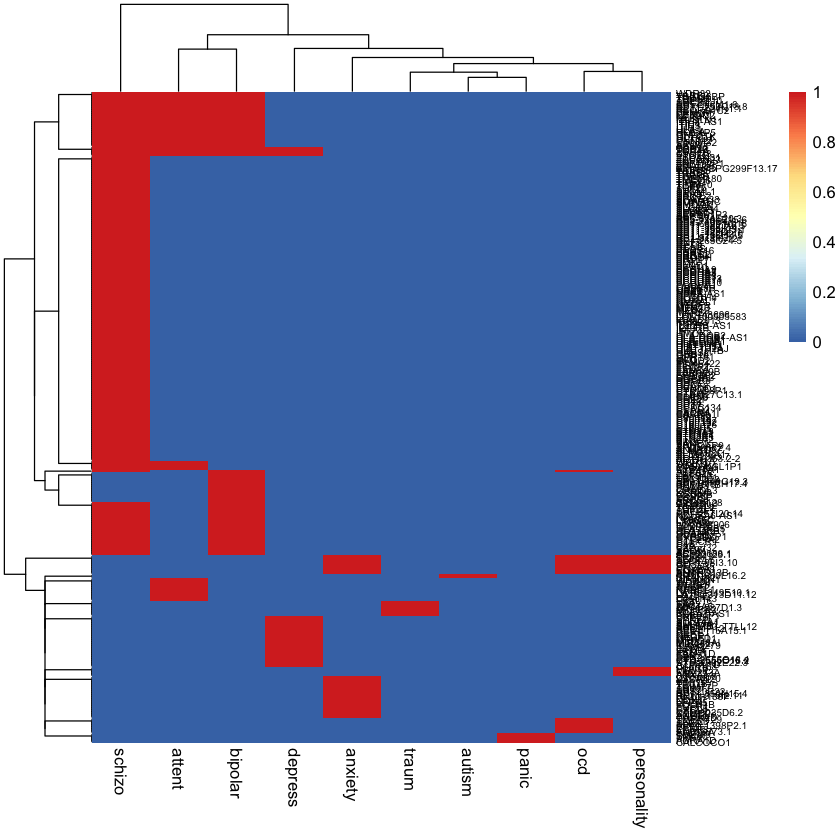

In [8]:
p = pheatmap(dz_gene_bin,fontsize_row=6)
save_pheatmap_pdf(p, 'dz_gene_bin_mat.pdf',height=25,width=7)

In [12]:
pdf('dz_gene_bin_dztree.pdf')
par(bg='white')
plot(p$tree_col)
dev.off()


pdf 
  2

# tissue disease bar chart

In [30]:
tissue_disease_df_long = read_csv('tissue_disease_df_long.csv')
colnames(tissue_disease_df_long) = c('X1','tissue','disease','count_snps')
tissue_disease_df_long$tissue = factor(tissue_disease_df_long$tissue, levels=c('HEK293','AST1','H9D0','H9D2','H9D4','H9D10','SL','SLC'))
head(tissue_disease_df_long)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  tissue = col_character(),
  variable = col_character(),
  value = col_double()
)



X1,tissue,disease,count_snps
<dbl>,<fct>,<chr>,<dbl>
0,AST1,anxiety,4
1,H9D0,anxiety,8
2,H9D10,anxiety,8
3,H9D2,anxiety,2
4,H9D4,anxiety,8
5,HEK293,anxiety,2


In [31]:
unique(tissue_disease_df_long$tissue)

[1] AST1   H9D0   H9D10  H9D2   H9D4   HEK293 SL     SLC   
Levels: HEK293 AST1 H9D0 H9D2 H9D4 H9D10 SL SLC

Saving 7 x 7 in image



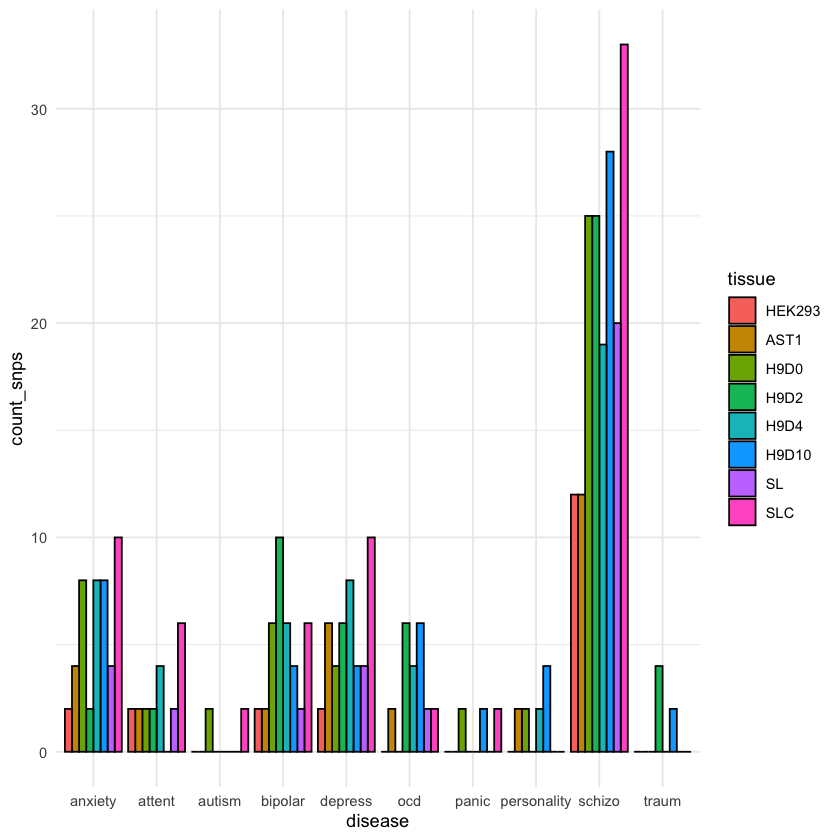

In [32]:
ggplot(data=tissue_disease_df_long, aes(x=disease, y=count_snps, fill=tissue)) +
geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_minimal()
ggsave('tissue_disease_df_long.pdf')

# per dz heatmaps

In [4]:
diseases = c('anxiety', 'attent', 'autism', 'bipolar', 'depress', 'ocd', 'panic', 'personality', 'schizo', 'traum')


[1] "anxiety"
[1] 13  8
[1] "attent"
[1] 6 7


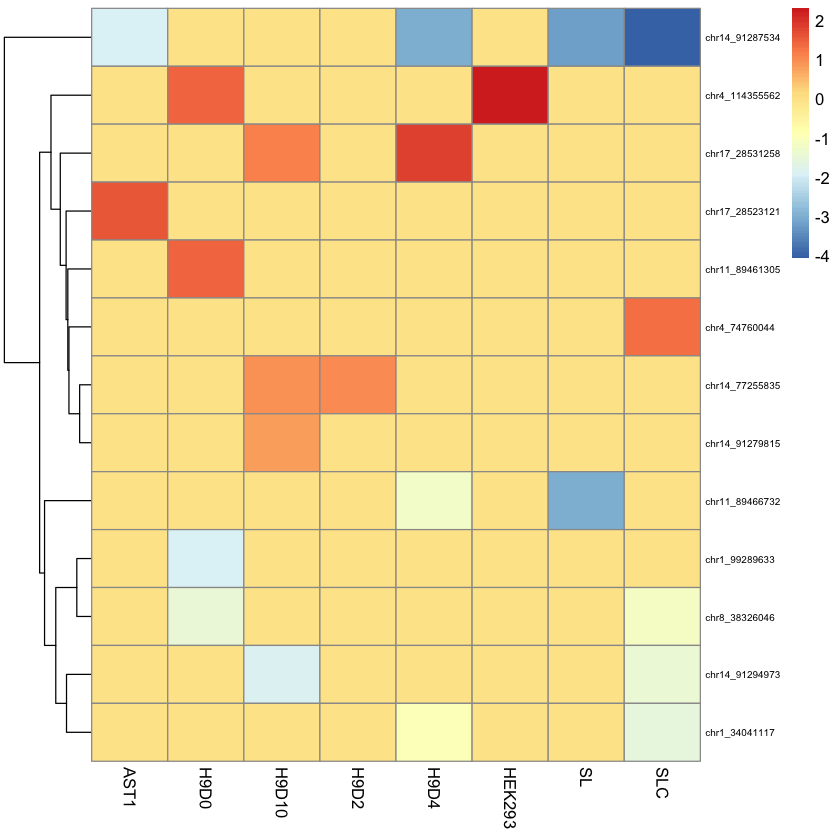

[1] "autism"
[1] 1 2
[1] "bipolar"
[1] 11  8


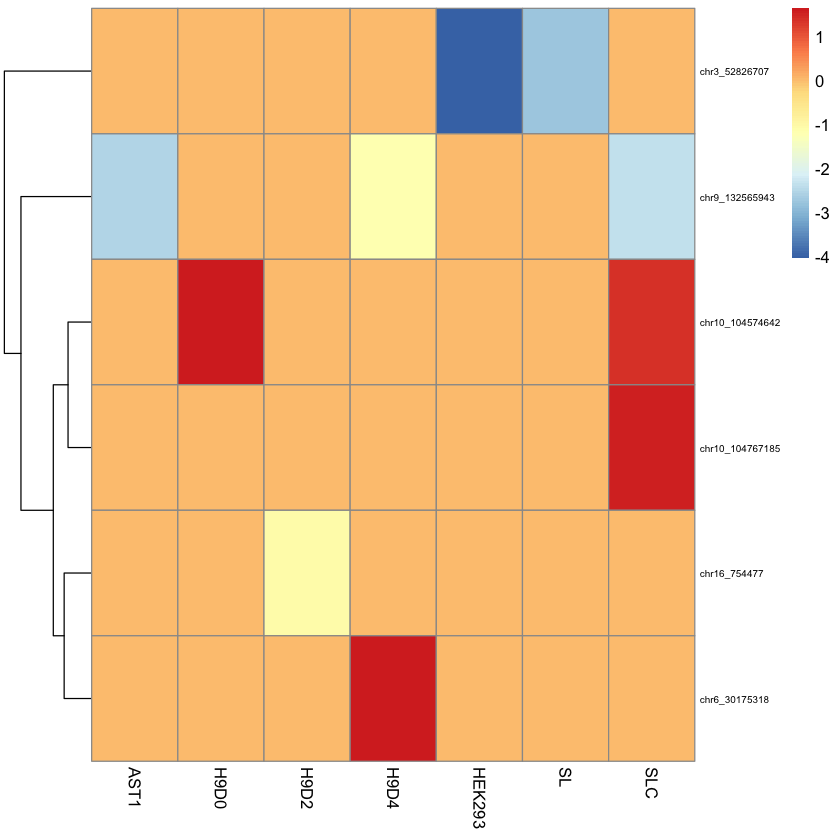

[1] "depress"
[1] 13  8


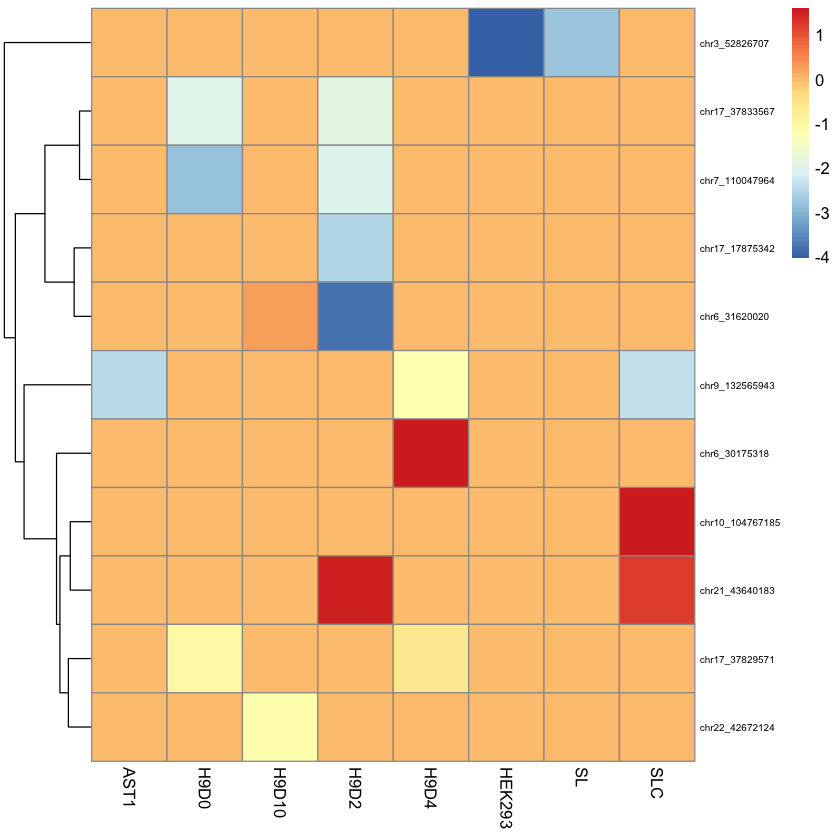

[1] "ocd"
[1] 6 6


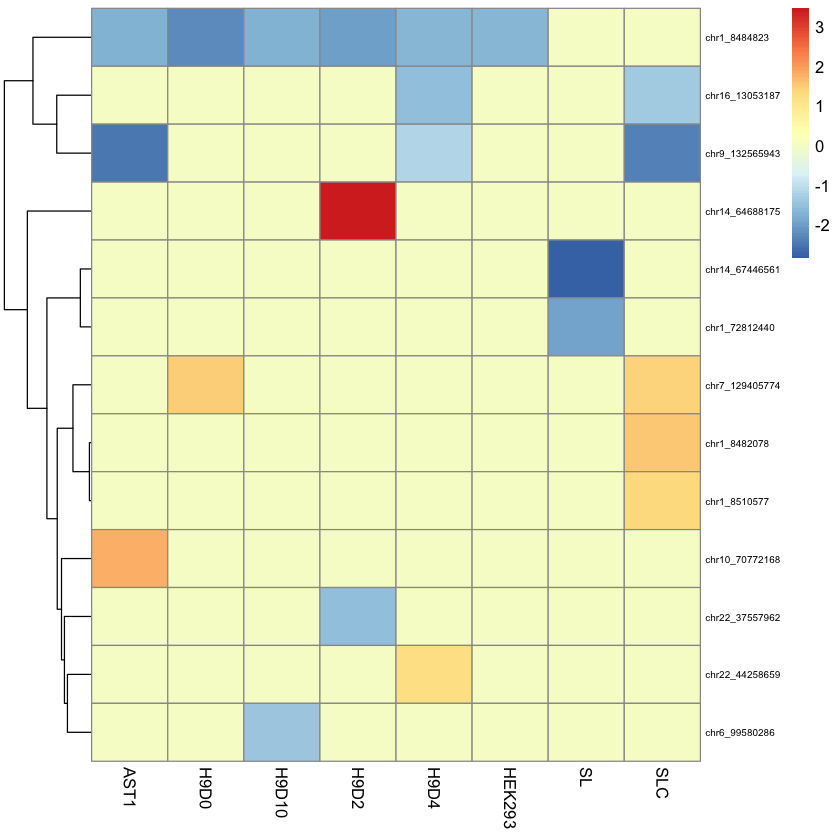

[1] "panic"
[1] 3 3


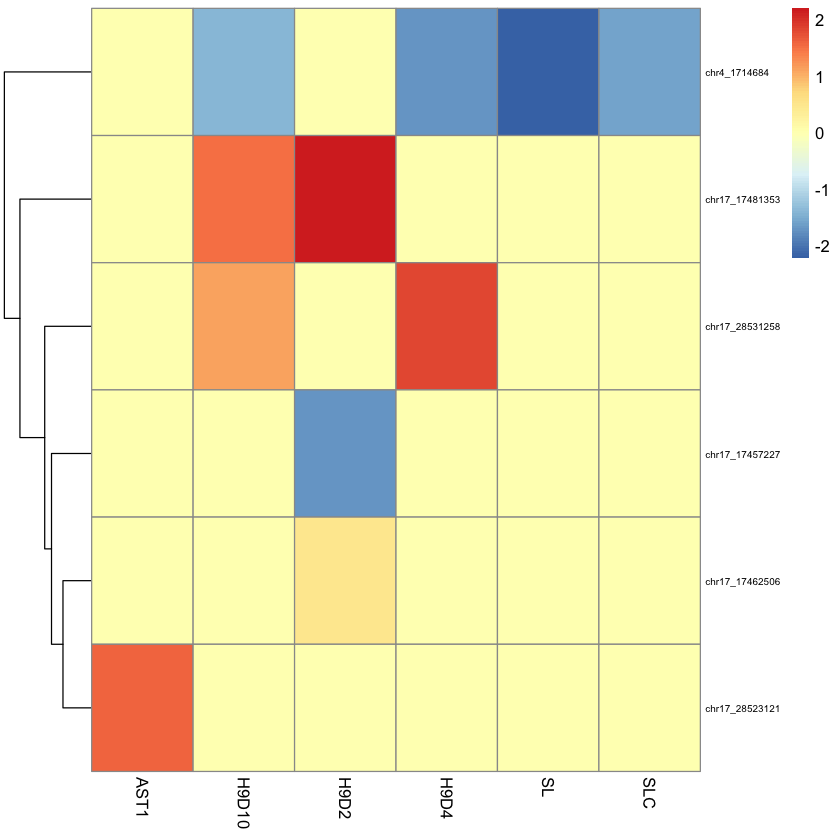

[1] "personality"
[1] 3 4


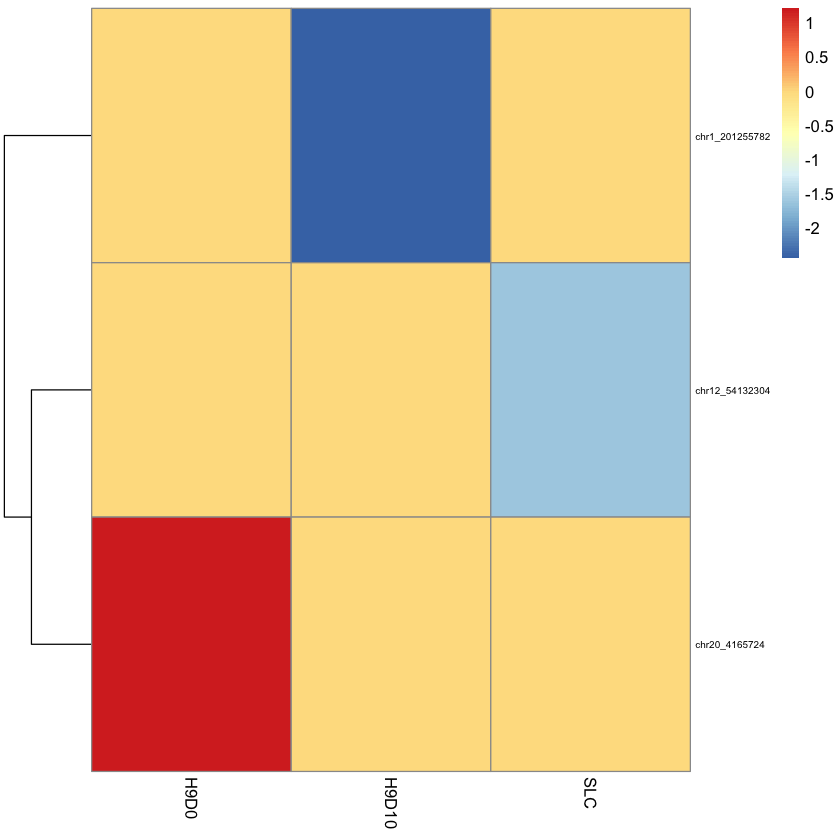

[1] "schizo"
[1] 52  8


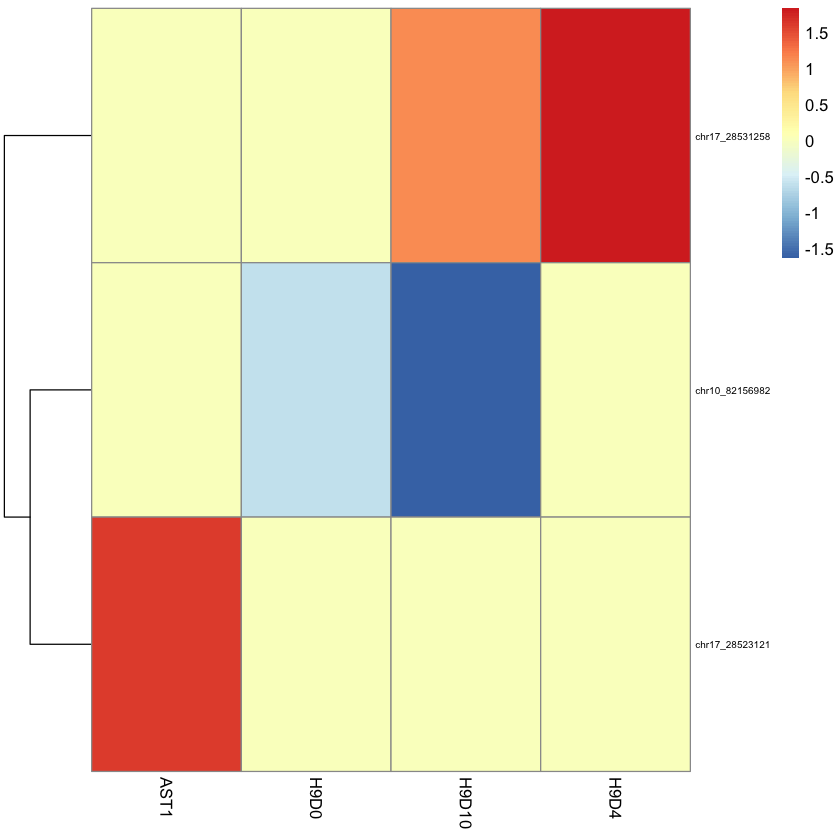

[1] "traum"
[1] 2 2


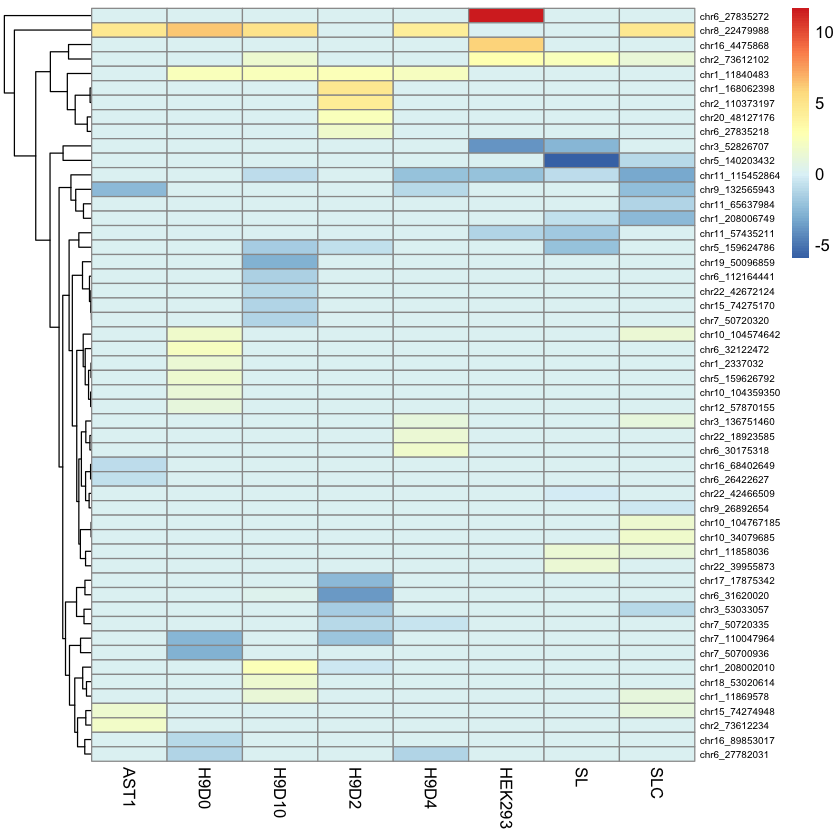

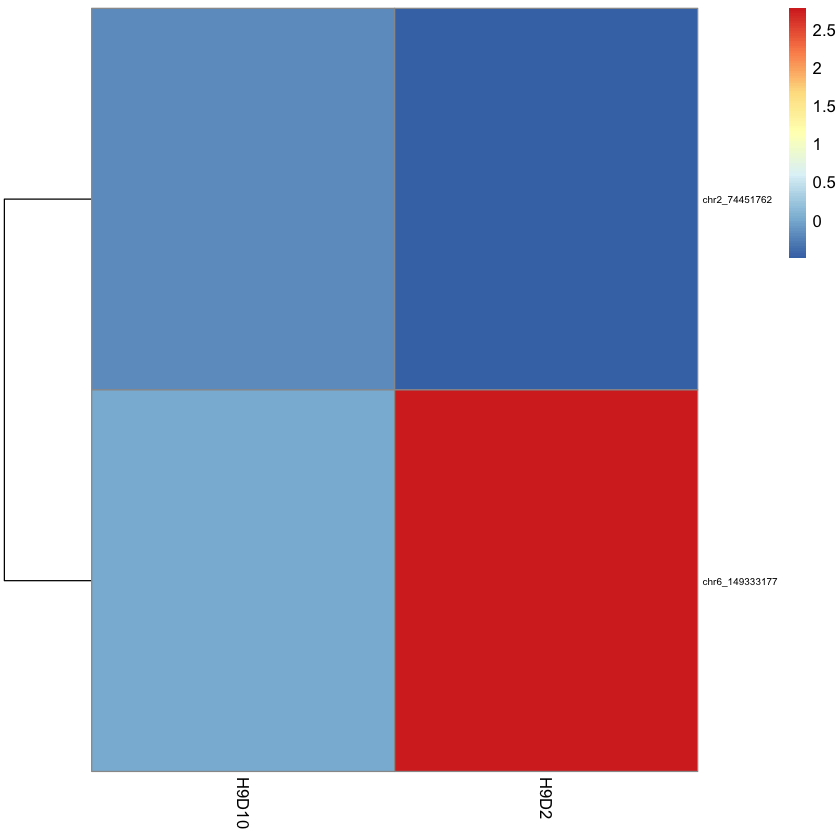

In [23]:
for (dz in diseases){
    dz_file = paste0('dz_snp_heatmaps/',dz,'.csv')
    dz_df = read.csv(dz_file)
    dz_df = dz_df[,order(colnames(dz_df))]
    dz_df = column_to_rownames(dz_df, 'rowname')
    print(dz)
    print(dim(dz_df))
    if(dim(dz_df)[1]>1){
        p = pheatmap(dz_df,fontsize_row=6,cluster_col=F)
        save_pheatmap_pdf(p, paste0('dz_snp_heatmaps/',dz,'.pdf'),height=7,width=7)
    }

}

,H9D10,H9D2
,<dbl>,<dbl>
chr2_74451762,-0.1779238,-0.4995231
chr6_149333177,0.0000000,2.7718162


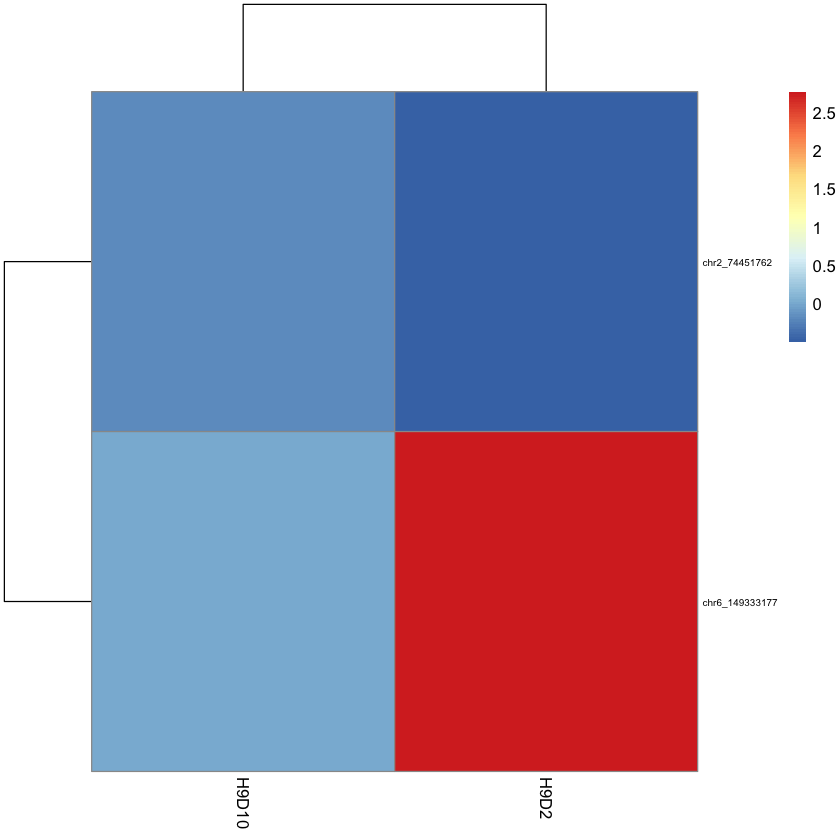